In [1]:
!pip install PyPDF2

In [2]:
pip install numpy==1.26.4

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install python-docx


Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install wordcloud
from wordcloud import WordCloud

In [5]:
import os
import docx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Function to extract text from .docx files
def extract_docx_text(docx_path):
    try:
        doc = docx.Document(docx_path)
        text = ''
        for para in doc.paragraphs:
            text += para.text + '\n'
        return text.strip() 
    except Exception as e:
        print(f"Error reading .docx file {docx_path}: {e}")
        return ''
def extract_doc_text(doc_path):
    try:
        import win32com.client
        word = win32com.client.Dispatch("Word.Application")
        doc = word.Documents.Open(doc_path)
        text = doc.Content.Text
        doc.Close()
        word.Quit()
        return text.strip()
    except Exception as e:
        print(f"Error reading .doc file {doc_path}: {e}")
        return ''
folder_path = r'C:\Users\vijay\Downloads\P548_dataset\P-344 Dataset'
file_names = []
job_roles = []
content_list = []
for subdir, _, files in os.walk(folder_path):
    for file_name in files:
        file_path = os.path.join(subdir, file_name)
        file_extension = os.path.splitext(file_name)[-1].lower()
        if not file_extension:
            print(f"Warning: {file_name} doesn't have an extension, assuming it's a .docx file.")
            file_extension = '.docx'
            file_name = file_name + '.docx'
            file_path = os.path.join(subdir, file_name)
        job_role = os.path.basename(subdir)
        print(f"Processing file: {file_name} (Extension: {file_extension}) in Job Role: {job_role}")
        if file_extension == '.docx':
            content = extract_docx_text(file_path)
            if content: 
                file_names.append(file_name)
                job_roles.append(job_role)
                content_list.append(content)
            else:
                print(f"Warning: No content extracted from {file_name}")
            
        elif file_extension == '.doc':
            content = extract_doc_text(file_path)
            if content: 
                file_names.append(file_name)
                job_roles.append(job_role)
                content_list.append(content)
            else:
                print(f"Warning: No content extracted from {file_name}")

if not file_names:
    print("No files processed successfully. Please check if files are in the correct format.")
else:
    df = pd.DataFrame({
        'file_name': file_names,
        'jobrole': job_roles,
        'content': content_list
    })

    # Save the DataFrame to a CSV file
    df.to_csv('extracted_resume_data_combined.csv', index=False)

    print("Content extracted and saved to 'extracted_resume_data_combined.csv'")


Processing file: Peoplesoft Admin_G Ananda Rayudu.docx (Extension: .docx) in Job Role: Peoplesoft
Error reading .docx file C:\Users\vijay\Downloads\P548_dataset\P-344 Dataset\Resumes_Docx\Peoplesoft\Peoplesoft Admin_G Ananda Rayudu.docx: "no relationship of type 'http://schemas.openxmlformats.org/officeDocument/2006/relationships/officeDocument' in collection"
Processing file: Peoplesoft Admin_AnubhavSingh.docx (Extension: .docx) in Job Role: Peoplesoft Resume
Processing file: Peoplesoft Admin_G Ananda Rayudu.doc (Extension: .doc) in Job Role: Peoplesoft Resume
Processing file: Peoplesoft Admin_Gangareddy.doc (Extension: .doc) in Job Role: Peoplesoft Resume
Processing file: Peoplesoft Admin_Murali.docx (Extension: .docx) in Job Role: Peoplesoft Resume
Processing file: Peoplesoft Admin_Priyanka Ramadoss.doc (Extension: .doc) in Job Role: Peoplesoft Resume
Processing file: Peoplesoft Admin_SirazuddinMohammad.docx (Extension: .docx) in Job Role: Peoplesoft Resume
Processing file: Peopleso

In [7]:
from IPython.display import FileLink
FileLink(r'extracted_resume_data_combined.csv')

C:\Users\vijay\python_practice\extracted_resume_data_combined.csv

In [8]:
data1=pd.read_csv('extracted_resume_data_combined.csv')

In [9]:
data1.head()

,file_name,jobrole,content
0,Peoplesoft Admin_AnubhavSingh.docx,Peoplesoft Resume,Anubhav Kumar Singh\t\t\n\n To work in a glob...
1,Peoplesoft Admin_G Ananda Rayudu.doc,Peoplesoft Resume,Profile Summary:\t\t\t\t\t\t\t\t\t\t\r7+ years...
2,Peoplesoft Admin_Gangareddy.doc,Peoplesoft Resume,PeopleSoft Database Administrator\r ...
3,Peoplesoft Admin_Murali.docx,Peoplesoft Resume,Murali\n\nExperience Summary \n\nI have 6 year...
4,Peoplesoft Admin_Priyanka Ramadoss.doc,Peoplesoft Resume,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo..."


In [10]:
data1

,file_name,jobrole,content
0,Peoplesoft Admin_AnubhavSingh.docx,Peoplesoft Resume,Anubhav Kumar Singh\t\t\n\n To work in a glob...
1,Peoplesoft Admin_G Ananda Rayudu.doc,Peoplesoft Resume,Profile Summary:\t\t\t\t\t\t\t\t\t\t\r7+ years...
2,Peoplesoft Admin_Gangareddy.doc,Peoplesoft Resume,PeopleSoft Database Administrator\r ...
3,Peoplesoft Admin_Murali.docx,Peoplesoft Resume,Murali\n\nExperience Summary \n\nI have 6 year...
4,Peoplesoft Admin_Priyanka Ramadoss.doc,Peoplesoft Resume,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo..."
...,...,...,...
73,Sri Krishna S_Hexaware.doc,workday,Workday Integration Consultant\r\rName ...
74,Srikanth-Hexaware.docx,workday,Seeking suitable positions in Workday HCM as ...
75,SSKumar_Hexaware.docx,workday,WORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nRol...
76,Venkateswarlu B_Hexaware.doc,workday,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...


In [11]:
import spacy

In [12]:
nlp=spacy.load('en_core_web_sm')

In [13]:
data1.drop('file_name',axis=1,inplace=True)

In [14]:
data1

,jobrole,content
0,Peoplesoft Resume,Anubhav Kumar Singh\t\t\n\n To work in a glob...
1,Peoplesoft Resume,Profile Summary:\t\t\t\t\t\t\t\t\t\t\r7+ years...
2,Peoplesoft Resume,PeopleSoft Database Administrator\r ...
3,Peoplesoft Resume,Murali\n\nExperience Summary \n\nI have 6 year...
4,Peoplesoft Resume,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo..."
...,...,...
73,workday,Workday Integration Consultant\r\rName ...
74,workday,Seeking suitable positions in Workday HCM as ...
75,workday,WORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nRol...
76,workday,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...


In [15]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x2228cf125d0>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x2228cf12c90>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x2228cdee810>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x2228d132a10>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x2228d140b10>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x2228cdee7a0>)]

In [16]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [17]:
data1.head()

,jobrole,content
0,Peoplesoft Resume,Anubhav Kumar Singh\t\t\n\n To work in a glob...
1,Peoplesoft Resume,Profile Summary:\t\t\t\t\t\t\t\t\t\t\r7+ years...
2,Peoplesoft Resume,PeopleSoft Database Administrator\r ...
3,Peoplesoft Resume,Murali\n\nExperience Summary \n\nI have 6 year...
4,Peoplesoft Resume,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo..."


#### prepocessing

In [18]:
def tokenize_docs_with_pos(docs):
    allowed_pos = {'NOUN', 'PROPN', 'VERB', 'ADJ'}
    processed = []

    for doc in nlp.pipe(docs, batch_size=50):
        tokens = [
            token.lemma_.lower()
            for token in doc
            if token.pos_ in allowed_pos               
            and not token.is_stop
            and not token.is_punct
            and not token.like_num
            and not token.is_space
            and token.is_alpha
        ]
        processed.append(tokens)

    return processed
data1['tokens'] = tokenize_docs_with_pos(data1['content'].astype(str))


In [19]:
data1.head()

,jobrole,content,tokens
0,Peoplesoft Resume,Anubhav Kumar Singh\t\t\n\n To work in a glob...,"[anubhav, kumar, singh, work, competitive, env..."
1,Peoplesoft Resume,Profile Summary:\t\t\t\t\t\t\t\t\t\t\r7+ years...,"[profile, summary, year, experience, implement..."
2,Peoplesoft Resume,PeopleSoft Database Administrator\r ...,"[peoplesoft, database, administrator, gangared..."
3,Peoplesoft Resume,Murali\n\nExperience Summary \n\nI have 6 year...,"[murali, experience, summary, year, experience..."
4,Peoplesoft Resume,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...","[priyanka, ramadoss, mountpleasant, coonoor, c..."


In [20]:
data1['tokens'][0][0]

'anubhav'

In [21]:
data1.head()

,jobrole,content,tokens
0,Peoplesoft Resume,Anubhav Kumar Singh\t\t\n\n To work in a glob...,"[anubhav, kumar, singh, work, competitive, env..."
1,Peoplesoft Resume,Profile Summary:\t\t\t\t\t\t\t\t\t\t\r7+ years...,"[profile, summary, year, experience, implement..."
2,Peoplesoft Resume,PeopleSoft Database Administrator\r ...,"[peoplesoft, database, administrator, gangared..."
3,Peoplesoft Resume,Murali\n\nExperience Summary \n\nI have 6 year...,"[murali, experience, summary, year, experience..."
4,Peoplesoft Resume,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...","[priyanka, ramadoss, mountpleasant, coonoor, c..."


In [22]:
data1.drop('content',axis=1,inplace=True)

In [23]:
data1.head()

,jobrole,tokens
0,Peoplesoft Resume,"[anubhav, kumar, singh, work, competitive, env..."
1,Peoplesoft Resume,"[profile, summary, year, experience, implement..."
2,Peoplesoft Resume,"[peoplesoft, database, administrator, gangared..."
3,Peoplesoft Resume,"[murali, experience, summary, year, experience..."
4,Peoplesoft Resume,"[priyanka, ramadoss, mountpleasant, coonoor, c..."


#### Visualization

##### 
Bar plot of resume counts by class (e.g., Data Scientist, Developer, Analyst).

Helps identify class imbalance.

<Axes: xlabel='jobrole', ylabel='count'>

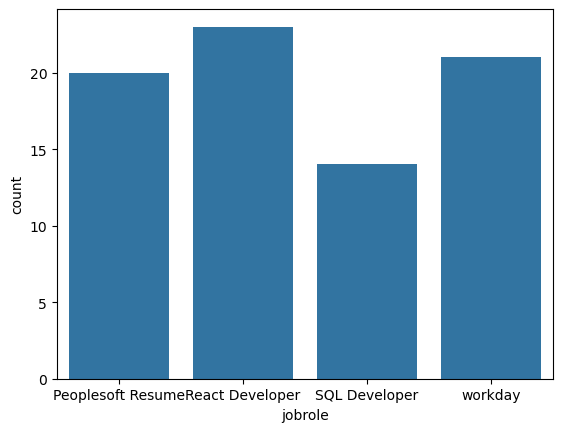

In [24]:
sns.countplot(x='jobrole', data=data1)

####
2. Top Keywords per Class
For each job category, extract top keywords using TF-IDF or CountVectorizer.

WordCloud or horizontal bar chart of top N words for each class.

In [25]:
data1['tokens_str'] = data1['tokens'].apply(lambda x: ' '.join(x))
### TF-IDF Vectorizer expects string input, not lists

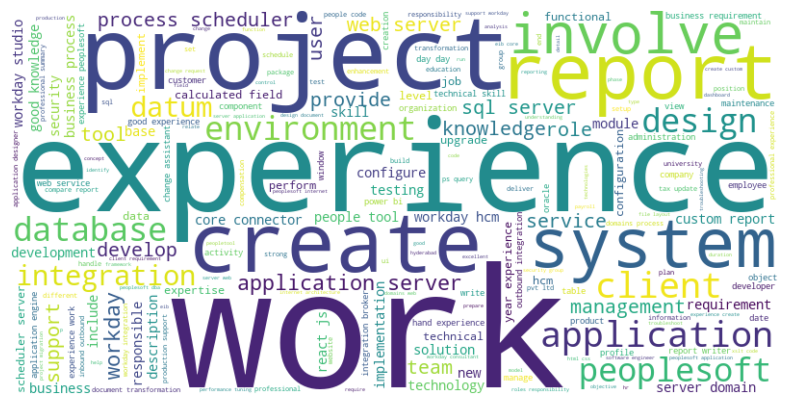

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all resume text
text = " ".join(data1['tokens_str'])  # Replace with your actual column name

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot it correctly
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')  # ✅ Use the variable, not class
plt.axis('off')
plt.show()


In [27]:
data1['word_count'] = data1['tokens_str'].apply(lambda x: len(str(x).split()))

#### Histogram of Word Counts

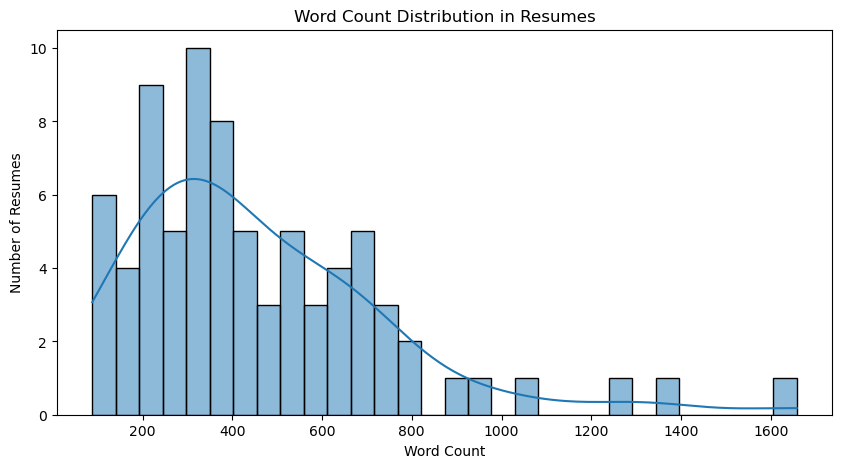

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(data1['word_count'], bins=30, kde=True)
plt.title("Word Count Distribution in Resumes")
plt.xlabel("Word Count")
plt.ylabel("Number of Resumes")
plt.show()


#### ENCODING

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
data1['jobrole'].unique()

array(['Peoplesoft Resume', 'React Developer', 'SQL Developer', 'workday'],
      dtype=object)

In [31]:
encode=LabelEncoder()
data1['jobrole']=encode.fit_transform(data1['jobrole'])

In [32]:
data1.head()

,jobrole,tokens,tokens_str,word_count
0,0,"[anubhav, kumar, singh, work, competitive, env...",anubhav kumar singh work competitive environme...,666
1,0,"[profile, summary, year, experience, implement...",profile summary year experience implement upgr...,693
2,0,"[peoplesoft, database, administrator, gangared...",peoplesoft database administrator gangareddy p...,542
3,0,"[murali, experience, summary, year, experience...",murali experience summary year experience work...,349
4,0,"[priyanka, ramadoss, mountpleasant, coonoor, c...",priyanka ramadoss mountpleasant coonoor career...,448


In [33]:
data1

,jobrole,tokens,tokens_str,word_count
0,0,"[anubhav, kumar, singh, work, competitive, env...",anubhav kumar singh work competitive environme...,666
1,0,"[profile, summary, year, experience, implement...",profile summary year experience implement upgr...,693
2,0,"[peoplesoft, database, administrator, gangared...",peoplesoft database administrator gangareddy p...,542
3,0,"[murali, experience, summary, year, experience...",murali experience summary year experience work...,349
4,0,"[priyanka, ramadoss, mountpleasant, coonoor, c...",priyanka ramadoss mountpleasant coonoor career...,448
...,...,...,...,...
73,3,"[workday, integration, consultant, sri, krishn...",workday integration consultant sri krishna s p...,675
74,3,"[seek, suitable, position, workday, hcm, techn...",seek suitable position workday hcm techno func...,612
75,3,"[workday, hcm, fcm, kumar, role, workday, cons...",workday hcm fcm kumar role workday consultant ...,717
76,3,"[venkateswarlu, b, workday, consultant, have, ...",venkateswarlu b workday consultant have year e...,596


##### SPLITTING THE DATASET 

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X=data1['tokens_str']
y=data1['jobrole']

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((62,), (16,), (62,), (16,))

#### TFIDF

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
vectorizer=TfidfVectorizer()
X_train_tfidf=vectorizer.fit_transform(X_train)
X_train_tfidf.shape

(62, 3095)

#### MODEL 1 SVM

In [39]:
from sklearn.svm import LinearSVC

In [40]:
clf=LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC()

In [41]:
yhat_train=clf.predict(X_train_tfidf)
yhat_train

array([1, 3, 0, 0, 1, 1, 3, 2, 1, 0, 1, 2, 2, 0, 1, 3, 2, 3, 0, 3, 1, 2,
       0, 2, 0, 0, 1, 0, 3, 0, 1, 3, 3, 2, 3, 0, 1, 1, 1, 2, 1, 2, 3, 3,
       0, 1, 3, 3, 3, 3, 1, 1, 0, 2, 1, 0, 1, 1, 3, 3, 0, 2])

#### BUILD A PIPELINE

In [42]:
from sklearn.pipeline import Pipeline
text_ppl=Pipeline([('tfidf',TfidfVectorizer()),
                  ('clf',LinearSVC())])
text_ppl.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [43]:
yhat_test=text_ppl.predict(X_test)

#### Metrics

In [44]:
from sklearn.metrics import confusion_matrix,classification_report

##### Training data

In [45]:
cm1=confusion_matrix(y_train,yhat_train)
cm1

array([[15,  0,  0,  0],
       [ 0, 19,  0,  0],
       [ 0,  0, 11,  0],
       [ 0,  0,  0, 17]], dtype=int64)

In [46]:
print(classification_report(y_train,yhat_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        17

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



<Axes: >

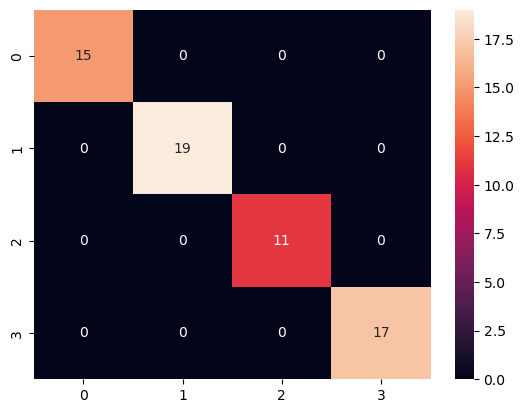

In [47]:
sns.heatmap(cm1,annot=True)

##### Testing data

In [48]:
cm2=confusion_matrix(y_test,yhat_test)
cm2

array([[5, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]], dtype=int64)

In [49]:
print(classification_report(y_test,yhat_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



<Axes: >

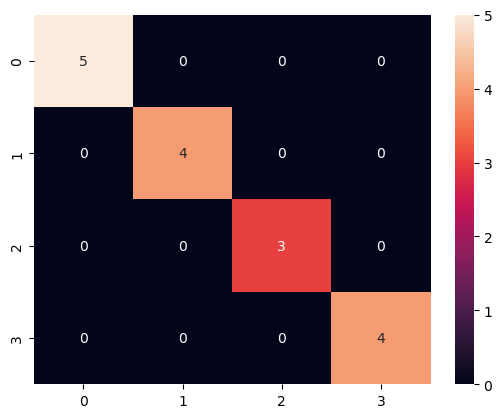

In [50]:
sns.heatmap(cm2,annot=True)

#### MODEL 2  Random Forest

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('rf', RandomForestClassifier(n_estimators=100)),
])
# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])

In [52]:
yhat_trainrc=text_clf.predict(X_train)

##### training metrics

In [53]:
cm3=confusion_matrix(y_train,yhat_trainrc)
cm3

array([[15,  0,  0,  0],
       [ 0, 19,  0,  0],
       [ 0,  0, 11,  0],
       [ 0,  0,  0, 17]], dtype=int64)

In [54]:
print(classification_report(y_train,yhat_trainrc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        17

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



<Axes: >

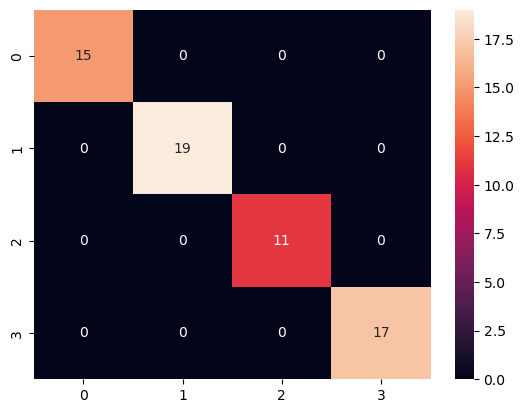

In [55]:
sns.heatmap(cm3,annot=True)

##### testing metrics

In [56]:
yhat_testrc=text_ppl.predict(X_test)

In [57]:
cm4=confusion_matrix(y_test,yhat_testrc)
cm4

array([[5, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]], dtype=int64)

<Axes: >

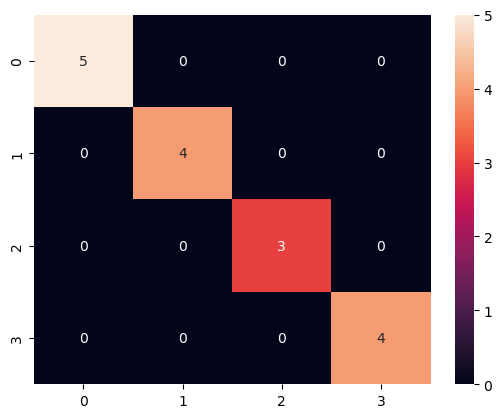

In [58]:
sns.heatmap(cm4,annot=True)

In [59]:
print(classification_report(y_test,yhat_testrc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



#### Model 3  XGBoost

In [60]:
from sklearn.pipeline import Pipeline
import xgboost as xgb

text_xgb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('xgbm', xgb.XGBClassifier(max_depth=6)),
])

# Feed the training data through the pipeline
text_xgb.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('xgbm',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

#### training metrics

In [61]:
yhat_trainxgb=text_xgb.predict(X_train)

In [62]:
cm5=confusion_matrix(y_train,yhat_trainxgb)
cm5

array([[15,  0,  0,  0],
       [ 0, 19,  0,  0],
       [ 0,  0, 11,  0],
       [ 0,  0,  0, 17]], dtype=int64)

<Axes: >

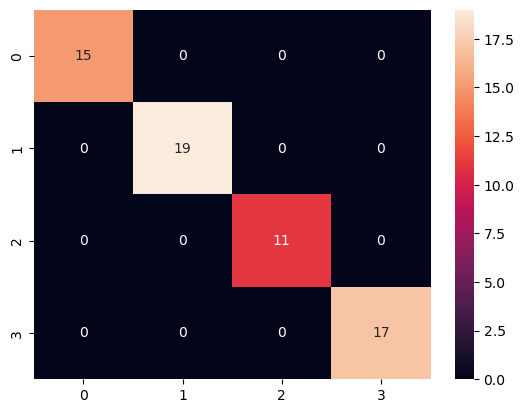

In [63]:
sns.heatmap(cm5,annot=True)

In [64]:
print(classification_report(y_train,yhat_trainxgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        17

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



#### Testing metrics

In [65]:
yhat_testxgb=text_xgb.predict(X_test)

In [66]:
cm6=confusion_matrix(y_test,yhat_testxgb)
cm6

array([[5, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]], dtype=int64)

<Axes: >

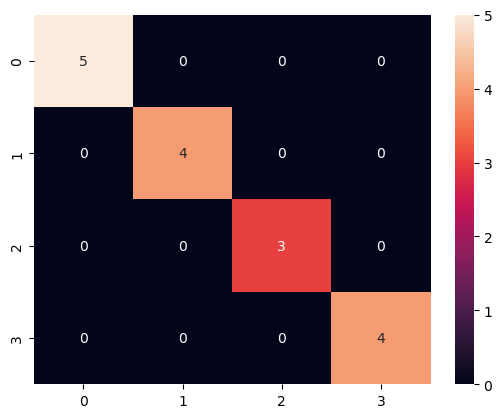

In [67]:
sns.heatmap(cm6,annot=True)

In [68]:
print(classification_report(y_test,yhat_testxgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



#### Model4 LightGBM

In [69]:
from sklearn.pipeline import Pipeline
import lightgbm as lgb

text_lgb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('lgbm', lgb.LGBMClassifier(verbose=0)),
])

# Feed the training data through the pipeline
text_lgb.fit(X_train, y_train)  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('lgbm', LGBMClassifier(verbose=0))])

#### Training metrics

In [70]:
yhat_trainlgb=text_lgb.predict(X_train)

In [71]:
cm7=confusion_matrix(y_train,yhat_trainlgb)
cm7

array([[15,  0,  0,  0],
       [ 0, 19,  0,  0],
       [ 0,  0, 11,  0],
       [ 0,  0,  0, 17]], dtype=int64)

<Axes: >

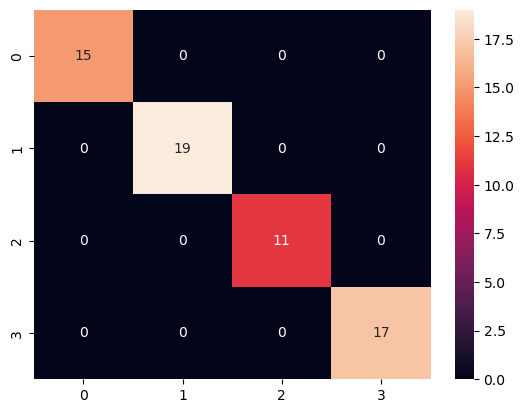

In [72]:
sns.heatmap(cm7,annot=True)

In [73]:
print(classification_report(y_train,yhat_trainlgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        17

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



#### Tesing metrics

In [74]:
yhat_testlgb=text_lgb.predict(X_test)

In [75]:
cm8=confusion_matrix(y_test,yhat_testlgb)
cm8

array([[5, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]], dtype=int64)

<Axes: >

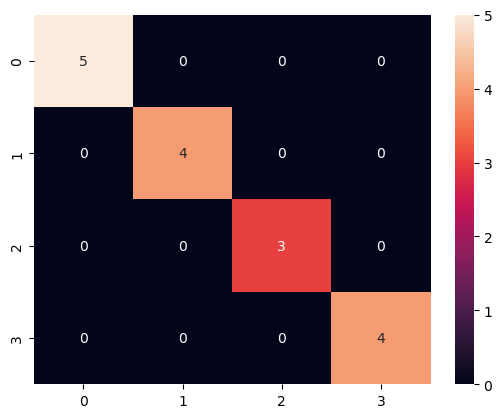

In [76]:
sns.heatmap(cm8,annot=True)

In [77]:
print(classification_report(y_test,yhat_testlgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



### converting text to numeric by using Bag of words

In [78]:
from sklearn.feature_extraction.text import CountVectorizer

#### Model 1 SVM

In [79]:
from sklearn.pipeline import Pipeline
text_ppl1=Pipeline([('bow',CountVectorizer()),
                  ('clf',LinearSVC())])
text_ppl1.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('clf', LinearSVC())])

#### Training metrics

In [80]:
yhat_trainbow1=text_ppl1.predict(X_train)

In [81]:
cm2=confusion_matrix(y_train,yhat_trainbow1)
cm2

array([[15,  0,  0,  0],
       [ 0, 19,  0,  0],
       [ 0,  0, 11,  0],
       [ 0,  0,  0, 17]], dtype=int64)

<Axes: >

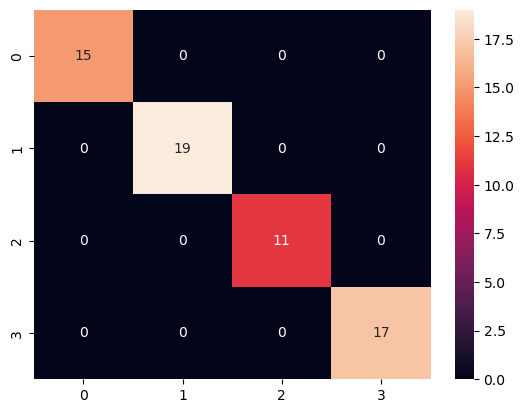

In [82]:
sns.heatmap(cm2,annot=True)

In [83]:
print(classification_report(y_train,yhat_trainbow1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        17

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



##### Testing metrics

In [84]:
yhat_testbow1=text_ppl1.predict(X_test)

In [85]:
cm2=confusion_matrix(y_test,yhat_testbow1)
cm2

array([[4, 1, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]], dtype=int64)

<Axes: >

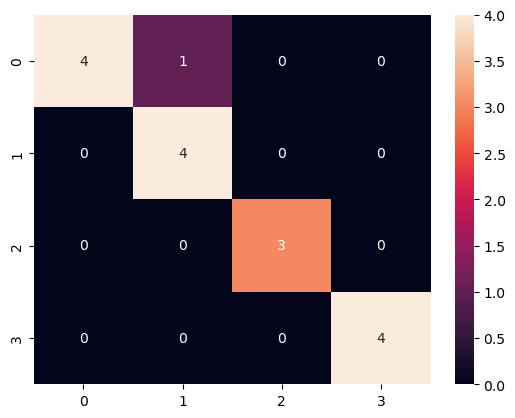

In [86]:
sns.heatmap(cm2,annot=True)

In [87]:
print(classification_report(y_test,yhat_testbow1))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.95      0.95      0.94        16
weighted avg       0.95      0.94      0.94        16



#### Model 2 Random Forest

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
text_clf1 = Pipeline([('bow',CountVectorizer()),
                     ('rf', RandomForestClassifier(n_estimators=100)),
])

# Feed the training data through the pipeline
text_clf1.fit(X_train, y_train)  

Pipeline(steps=[('bow', CountVectorizer()), ('rf', RandomForestClassifier())])

#### training metrics

In [89]:
yhat_trainbow2=text_clf1.predict(X_train)

In [90]:
cm2=confusion_matrix(y_train,yhat_trainbow2)
cm2

array([[15,  0,  0,  0],
       [ 0, 19,  0,  0],
       [ 0,  0, 11,  0],
       [ 0,  0,  0, 17]], dtype=int64)

<Axes: >

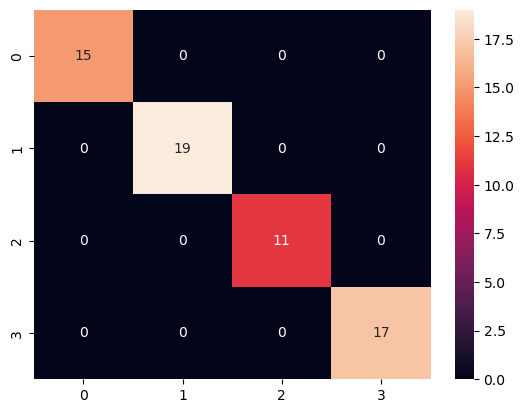

In [91]:
sns.heatmap(cm2,annot=True)

In [92]:
print(classification_report(y_train,yhat_trainbow2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        17

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



#### tesing metrics

In [93]:
yhat_testbow2=text_clf1.predict(X_test)

In [94]:
cm2=confusion_matrix(y_test,yhat_testbow2)
cm2

array([[4, 1, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]], dtype=int64)

<Axes: >

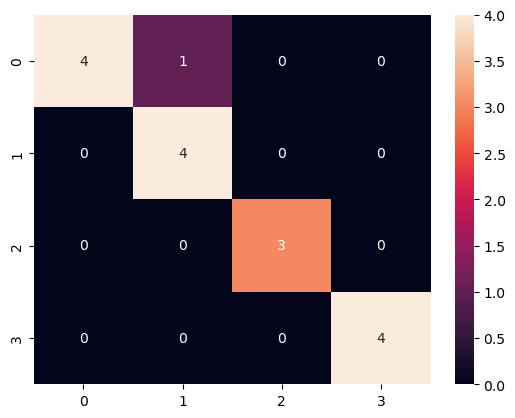

In [95]:
sns.heatmap(cm2,annot=True)

In [96]:
print(classification_report(y_test,yhat_testbow2))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.95      0.95      0.94        16
weighted avg       0.95      0.94      0.94        16



#### Model 3 XGBoost

In [97]:
from sklearn.pipeline import Pipeline
import xgboost as xgb

text_xgb1 = Pipeline([('bow',CountVectorizer()),
                     ('xgbm', xgb.XGBClassifier(max_depth=6)),
])

# Feed the training data through the pipeline
text_xgb1.fit(X_train, y_train)  

Pipeline(steps=[('bow', CountVectorizer()),
                ('xgbm',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

##### Training metrics

In [98]:
yhat_trainbow3=text_xgb1.predict(X_train)

In [99]:
cm2=confusion_matrix(y_train,yhat_trainbow3)
cm2

array([[15,  0,  0,  0],
       [ 0, 19,  0,  0],
       [ 0,  0, 11,  0],
       [ 0,  0,  0, 17]], dtype=int64)

<Axes: >

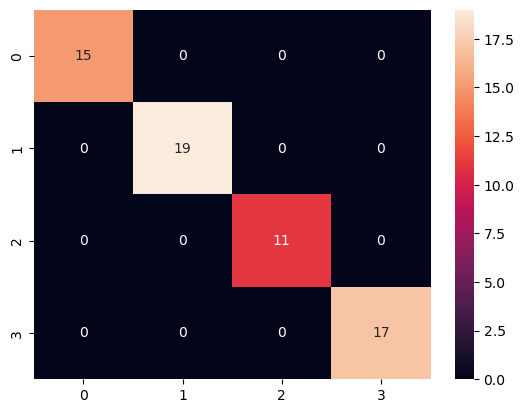

In [100]:
sns.heatmap(cm2,annot=True)

In [101]:
print(classification_report(y_train,yhat_trainbow3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        17

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



##### Testing Metrics

In [102]:
yhat_testbow3=text_xgb1.predict(X_test)

In [103]:
cm2=confusion_matrix(y_test,yhat_testbow3)
cm2

array([[5, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]], dtype=int64)

<Axes: >

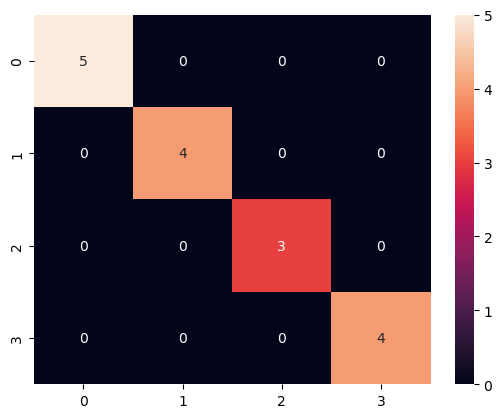

In [104]:
sns.heatmap(cm2,annot=True)

In [105]:
print(classification_report(y_test,yhat_testbow3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



#### Model 4 LightGBM

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import FunctionTransformer
import lightgbm as lgb
import numpy as np
text_lgb1 = Pipeline([
    ('bow', CountVectorizer()),
    ('to_float', FunctionTransformer(lambda x: x.astype(np.float32), accept_sparse=True)),
    ('lgbm', lgb.LGBMClassifier(verbose=0))
])
text_lgb1.fit(X_train, y_train) 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Pipeline(steps=[('bow', CountVectorizer()),
                ('to_float',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x0000022299509440>)),
                ('lgbm', LGBMClassifier(verbose=0))])

#### Traning Metrics

In [107]:
yhat_trainbow4=text_lgb1.predict(X_train)

In [108]:
cm2=confusion_matrix(y_train,yhat_trainbow4)
cm2

array([[15,  0,  0,  0],
       [ 0, 19,  0,  0],
       [ 0,  0, 11,  0],
       [ 0,  0,  0, 17]], dtype=int64)

<Axes: >

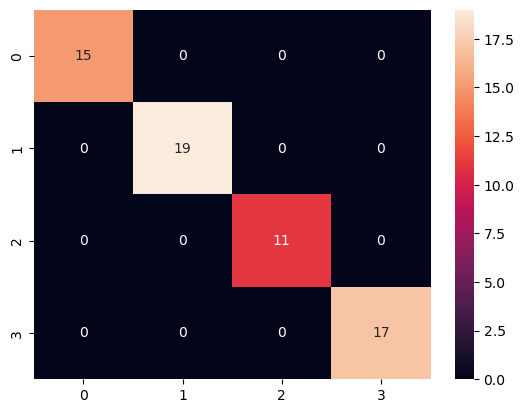

In [109]:
sns.heatmap(cm2,annot=True)

In [110]:
print(classification_report(y_train,yhat_trainbow4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        17

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



#### Testing metrics

In [111]:
yhat_testbow4=text_lgb1.predict(X_test)

In [112]:
cm2=confusion_matrix(y_test,yhat_testbow4)
cm2

array([[4, 1, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]], dtype=int64)

<Axes: >

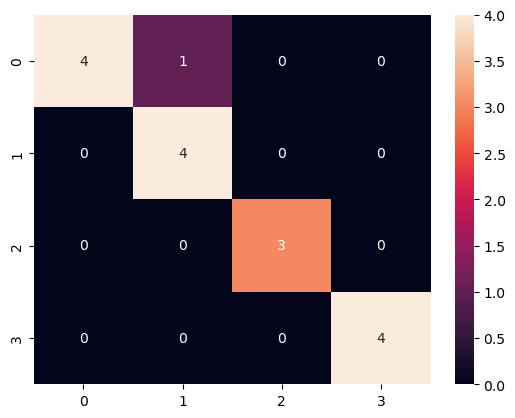

In [113]:
sns.heatmap(cm2,annot=True)

In [114]:
print(classification_report(y_test,yhat_testbow4))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.95      0.95      0.94        16
weighted avg       0.95      0.94      0.94        16



In [115]:
results = {
    'Model': ['SVM', 'RandomForest', 'XGBoost', 'LightGBM'],
    'TF-IDF Accuracy': [1.0, 1.0, 1.0, 1.0],
    'BoW Accuracy': [0.94, 0.94, 1.0, 0.94]
}
df_results = pd.DataFrame(results)

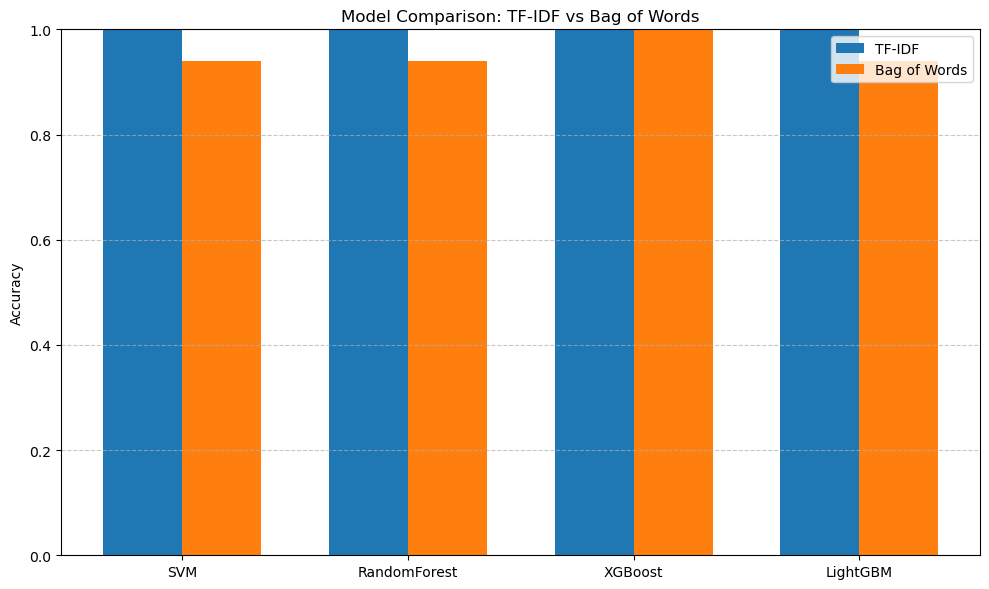

In [116]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(len(df_results['Model']))
width = 0.35 
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, df_results['TF-IDF Accuracy'], width, label='TF-IDF')
rects2 = ax.bar(x + width/2, df_results['BoW Accuracy'], width, label='Bag of Words')
plt.ylabel('Accuracy')
plt.title('Model Comparison: TF-IDF vs Bag of Words')
plt.xticks(x)
ax.set_xticklabels(df_results['Model'])
plt.legend()
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Conclusion
In this project, we implemented and evaluated multiple machine learning models—SVM, Random Forest, XGBoost, and LightGBM—on a text classification task using two popular feature extraction techniques: TF-IDF and Bag of Words (BoW).

The results demonstrate that:

All models achieved 100% accuracy with TF-IDF, indicating that this method captured the semantic relevance of words more effectively in our dataset.

With BoW, performance slightly dropped for SVM, Random Forest, and LightGBM (94%), while XGBoost maintained 100% accuracy, highlighting its robustness across different feature representations.

 TF-IDF proved to be a more reliable feature extraction technique in this context, providing consistent and superior model performance.
 XGBoost emerged as the best-performing model, showing perfect accuracy across both TF-IDF and BoW.

These results validate the importance of choosing the right combination of feature extraction and model for text-based classification tasks.


#### Final model:SVM

In [118]:
import pickle
pickle.dump(text_ppl,open("pipeline1.pkl", "wb"))
pickle.dump(encode,open("label_encoder.pkl", "wb"))